In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
import pandas as pd
import os 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score
import math
from tensorflow.keras.models import load_model

In [2]:
image_path=r"C:\Users\DELL\OneDrive\Desktop\Anaconda Workspace\Mini Project gtsrb\Dataset\Train"
# os.listdir(image_path)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

In [5]:
# labels=['7',
#  '17',
#  '19',
#  '22',
#  '2',
#  '35',
#  '23',
#  '10',
#  '5',
#  '36',
#  '20',
#  '27',
#  '41',
#  '39',
#  '32',
#  '25',
#  '42',
#  '8',
#  '38',
#  '12',
#  '0',
#  '31',
#  '34',
#  '18',
#  '28',
#  '16',
#  '13',
#  '26',
#  '15',
#  '3',
#  '1',
#     ]

labels = [
 '7', '17', '19', '22', '2', '35', '23', '10', '5', '36', '20', '27', '41', '39', 
 '32', '25', '42', '8', '38', '12', '0', '31', '34', '18', '28', '16', '13', '26', 
 '15', '3', '1', '30', '14', '4', '9', '21', '40', '6', '37', '33', '29', '24', '11'
]


In [7]:
img_list=[]
label_list=[]
for label in labels:
    for img in os.listdir(image_path+"\\"+label):
        img_list.append(image_path+"\\"+label+"\\"+img)
        label_list.append(label)

In [9]:
len(label_list)

39209

In [11]:
df=pd.DataFrame({"img":img_list,"label":label_list})
df.sample(10)

,img,label
18025,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,12
37806,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,24
12491,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,39
29006,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,1
12578,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,32
2780,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,22
18277,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,12
8611,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,10
6174,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,35
35725,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,40


In [13]:
df.shape

(39209, 2)

In [15]:
df["label"]=df["label"].astype(int)

In [17]:
df["label"].value_counts()

label
2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
35    1200
18    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
34     420
6      420
16     420
36     390
22     390
20     360
40     360
21     330
39     300
24     270
29     270
42     240
41     240
32     240
27     240
37     210
19     210
0      210
Name: count, dtype: int64

In [21]:
# label_name={7:"Speed Limit 100",
#  17:"No Entry",
#  19:"Curve to left",
#  22:"Uneven Road",
#  2:"Speed Limit 50",
#  35:"Ahead Only",
#  23:"Slippery Road",
#  10:"No overtaking by trucks",
#  5:"Speed Limit 80",
#  36:"Proceed straight or turn right",
#  20:"Curve to right",
#  27:"No pedestrians",
#  41:"No overtaking",
#  39:"Pass onto left",
#  32:"No parking",
#  25:"Roadworks",
#  42:"End of Truck Overtaking Prohibition",
#  8:"Speed Limit 120" ,
#  38:"Pass onto right",
#  12:"Priority Road",
#  0:"Speed Limit 20",
#  31:"Wild animals",
#  34:"Turn left ahead",
#  18:"Other Hazards",
#  28:"Children",
#  16:"No trucks",
#  13:"Give way",
#  26:"Traffic lights",
#  15:"All vehicles prohibited in both directions",
#  3:"Speed Limit 60",
#  1:"Speed Limit 30",
#  30:"Be careful in winter",
#  14:"Stop",
#  4:"Speed Limit 70",
#  9:"Speed Limit 100",
#  21:"Double curve, first to the left",
#  40:"Roundabout",
#  6: "End of a Speed Limit 80",
#  37:"Proceed straight or turn left",
#  33:"Turn right ahead",
#  29:"Cycle Route",
#  24:"Road Narrows Near Side",
# 11:"Crossroads"}


label_name = {
    0: "Speed Limit 20",
    1: "Speed Limit 30",
    2: "Speed Limit 50",
    3: "Speed Limit 60",
    4: "Speed Limit 70",
    5: "Speed Limit 80",
    6: "End of a Speed Limit 80",
    7: "Speed Limit 100",
    8: "Speed Limit 120",
    9: "Speed Limit 100",
    10: "No overtaking by trucks",
    11: "Crossroads",
    12: "Priority Road",
    13: "Give way",
    14: "Stop",
    15: "All vehicles prohibited in both directions",
    16: "No trucks",
    17: "No Entry",
    18: "Other Hazards",
    19: "Curve to left",
    20: "Curve to right",
    21: "Double curve, first to the left",
    22: "Uneven Road",
    23: "Slippery Road",
    24: "Road Narrows Near Side",
    25: "Roadworks",
    26: "Traffic lights",
    27: "No pedestrians",
    28: "Children",
    29: "Cycle Route",
    30: "Be careful in winter",
    31: "Wild animals",
    32: "No parking",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead Only",
    36: "Proceed straight or turn right",
    37: "Proceed straight or turn left",
    38: "Pass onto right",
    39: "Pass onto left",
    40: "Roundabout",
    41: "No overtaking",
    42: "End of Truck Overtaking Prohibition"
}

In [23]:
df["actual_label"]=df["label"].map(label_name)

In [25]:
df.sample(5)

,img,label,actual_label
11327,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,36,Proceed straight or turn right
9071,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,10,No overtaking by trucks
22075,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,18,Other Hazards
24245,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,13,Give way
34488,C:\Users\DELL\OneDrive\Desktop\Anaconda Worksp...,9,Speed Limit 100


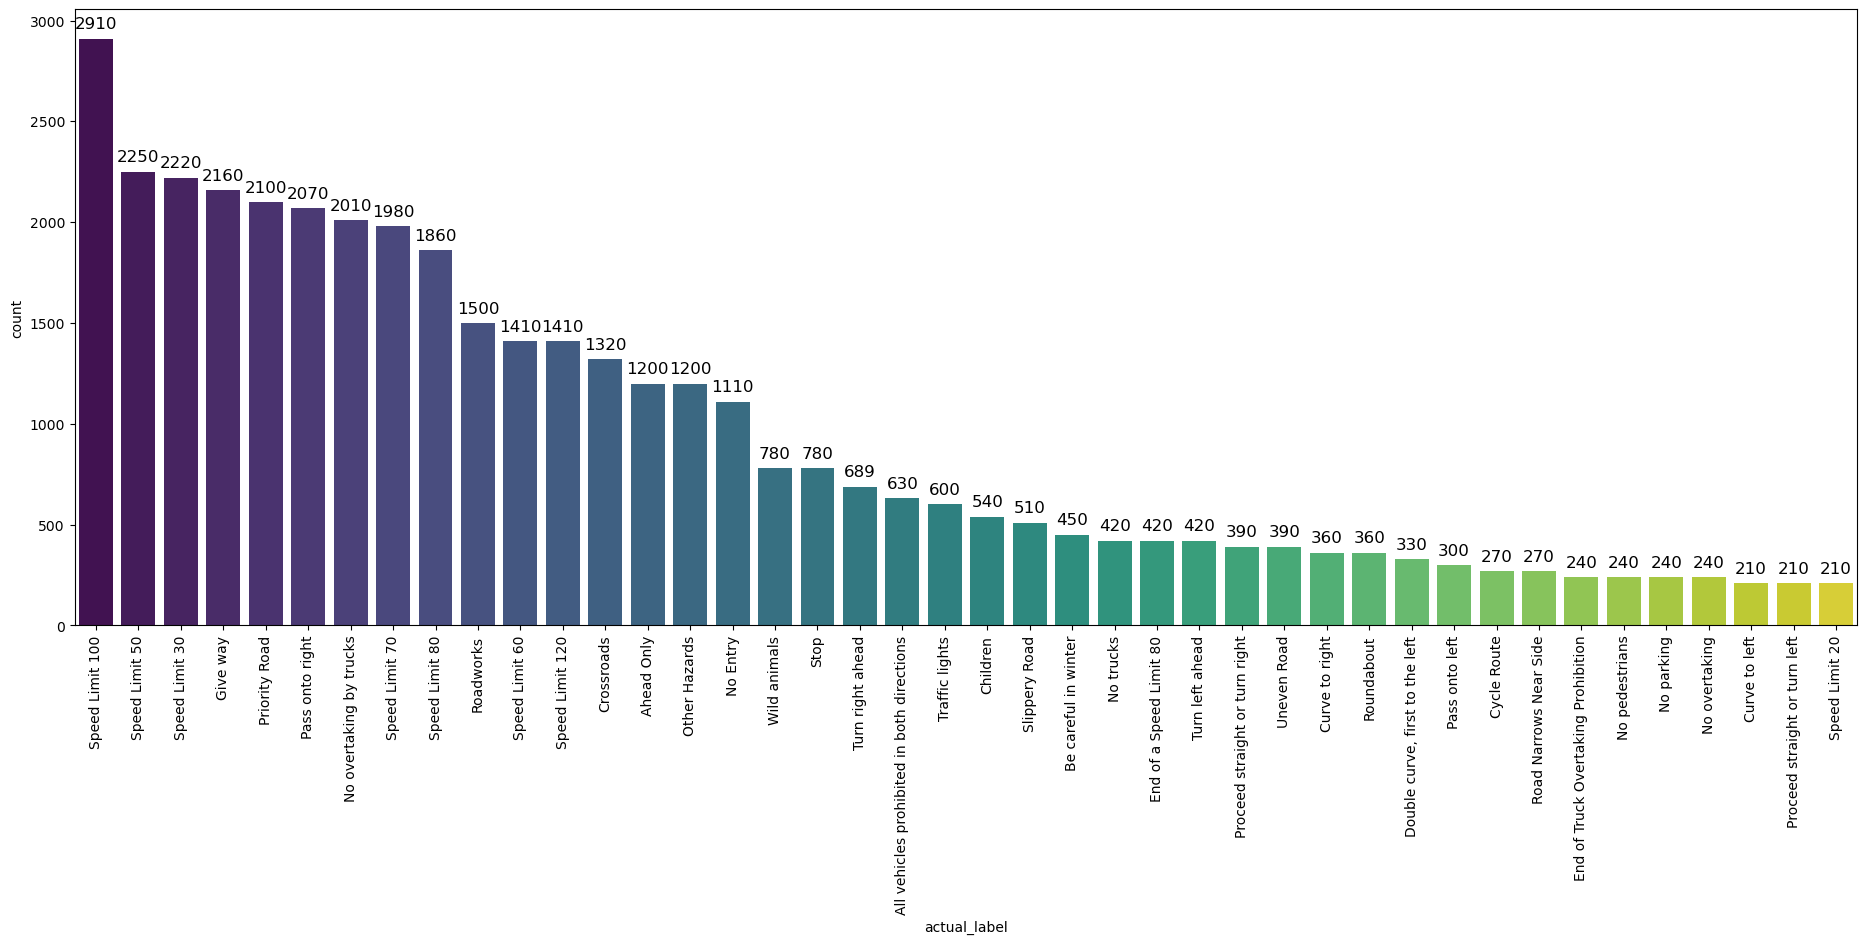

In [27]:
plt.figure(figsize=(23,8))
ax=sns.countplot(x=df["actual_label"],palette="viridis",order=df['actual_label'].value_counts().index)
for p in ax.containers:
    ax.bar_label(p, fontsize=12, color='black', padding=5)
plt.xticks(rotation=90);

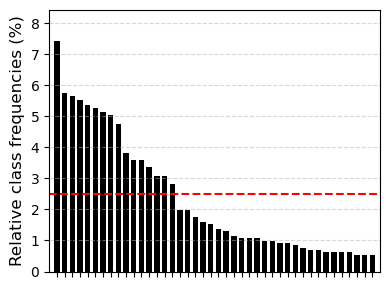

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute relative frequencies in percentage
counts = df["actual_label"].value_counts(normalize=True) * 100  

plt.figure(figsize=(4, 3))

# Bar plot with thin black bars
plt.bar(range(len(counts)), counts.values, color="black", width=0.7)

# Add red dashed line at 2.5%
plt.axhline(y=2.5, color="red", linestyle="--", linewidth=1.5)

# Formatting
plt.ylabel("Relative class frequencies (%)", fontsize=12)
plt.xlabel("")  # No x-axis label
plt.xticks(np.arange(len(counts)), labels=[""] * len(counts))  # Remove labels
plt.xlim(-1, len(counts))  # Ensure bars are well-spaced
plt.ylim(0, max(counts) + 1)  # Adjust y-axis range
plt.grid(axis="y", linestyle="--", alpha=0.5)  # Light grid for readability

plt.tight_layout()
plt.show()


In [27]:
count=0
x=[]
print("processing image number")
for img in df['img']:
    #print(img)
    count+=1
    img=cv2.imread(img)
    print(count,end="\r")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(32,32))
    img=img/255.0 #normalization
    x.append(img)
    #print(count,end="\r")

processing image number


In [34]:
x=np.array(x)

In [36]:
y=df[["label"]]

In [38]:
x.shape,y.shape

((39209, 32, 32, 3), (39209, 1))

In [44]:
from imblearn.over_sampling import SMOTE
x_flat = x.reshape(x.shape[0], -1)  
y_flat = y['label'].values 
smote = SMOTE(random_state=42)
# x_resampled, y_resampled = smote.fit_resample(x_flat, y_flat)
# x_resampled_images = x_resampled.reshape(-1, 32, 32, 3)
x_resampled,y_resampled=x_flat,y_flat
x_resampled_images = x_resampled.reshape(-1, 32, 32, 3)


In [46]:
x_resampled_images.shape,y_resampled.shape

((39209, 32, 32, 3), (39209,))

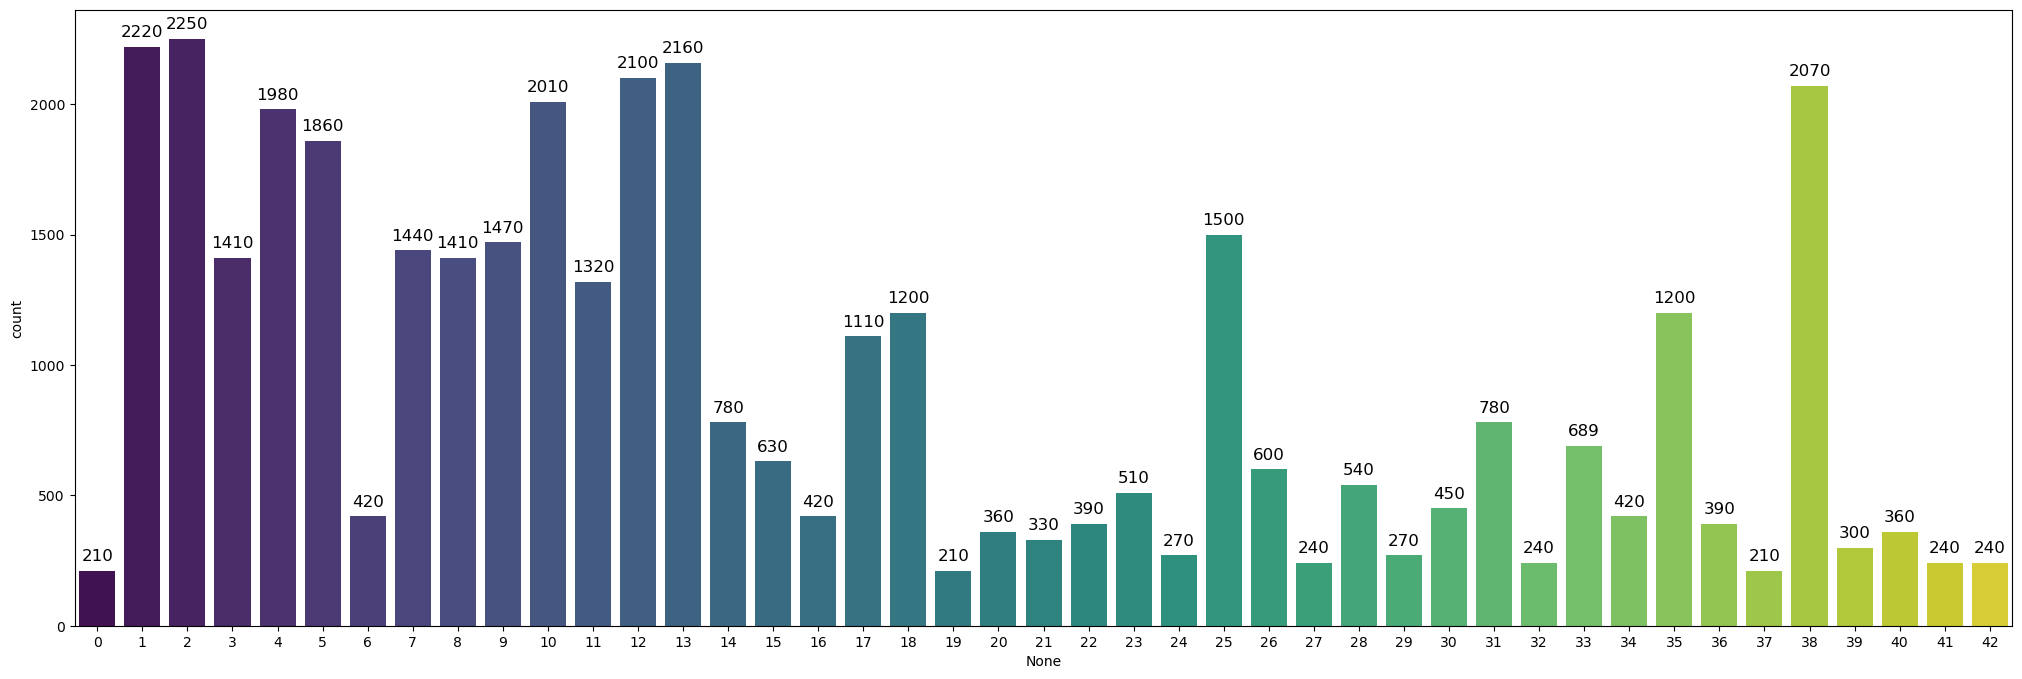

In [74]:
plt.figure(figsize=(25,8))
y_resampled_series = pd.Series(y_resampled)
ax=sns.countplot(x=y_resampled_series,palette="viridis")
for p in ax.containers:
    ax.bar_label(p, fontsize=12, color='black', padding=5);

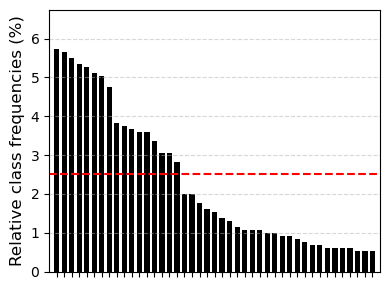

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convert to relative frequency (%)
y_resampled_series = pd.Series(y_resampled)
counts = y_resampled_series.value_counts(normalize=True) * 100  

plt.figure(figsize=(4, 3))

# Bar plot with thin black bars
plt.bar(range(len(counts)), counts.values, color="black", width=0.7)

# Add red dashed line at 2.5%
plt.axhline(y=2.5, color="red", linestyle="--", linewidth=1.5)

# Formatting
plt.ylabel("Relative class frequencies (%)", fontsize=12)
plt.xlabel("")  # No x-axis label
plt.xticks(np.arange(len(counts)), labels=[""] * len(counts))  # Remove labels
plt.xlim(-1, len(counts))  # Ensure bars are well-spaced
plt.ylim(0, max(counts) + 1)  # Adjust y-axis range
plt.grid(axis="y", linestyle="--", alpha=0.5)  # Light grid for readability

plt.tight_layout()
plt.show()


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled_images,y_resampled,test_size=.2,random_state=42)

In [70]:
np.unique(y_train,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([ 169, 1776, 1806, 1115, 1584, 1522,  333, 1116, 1150, 1196, 1593,
        1074, 1647, 1729,  615,  496,  348,  879,  955,  172,  293,  258,
         306,  407,  219, 1223,  482,  197,  422,  215,  365,  598,  181,
         548,  349,  947,  313,  174, 1702,  228,  281,  198,  186],
       dtype=int64))

In [54]:
model=Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,022,699 (30.60 MB)

 Trainable params: 8,018,731 (30.59 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.utils import plot_model
from tabulate import tabulate
import io
import sys



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Capture model.summary() output
stream = io.StringIO()
sys.stdout = stream
model.summary()
sys.stdout = sys.__stdout__
summary_str = stream.getvalue()

# Convert to table format
lines = summary_str.split("\n")[1:-4]  # Remove top and bottom summary text
table_data = []
for line in lines:
    cols = line.split()
    if len(cols) >= 3:
        layer_type = cols[0]
        output_shape = cols[-2]
        params = cols[-1]
        table_data.append([layer_type, output_shape, params])

# Print table in LaTeX/Markdown format for paper
print(tabulate(table_data, headers=["Layer Type", "Output Shape", "Params"], tablefmt="grid"))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,022,699 (30.60 MB)

 Trainable params: 8,018,731 (30.59 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [60]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=36,verbose=1)

Epoch 1/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 217s 249ms/step - accuracy: 0.1568 - loss: 3.1325 - val_accuracy: 0.5420 - val_loss: 1.2758
Epoch 2/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 218s 250ms/step - accuracy: 0.5987 - loss: 1.1732 - val_accuracy: 0.8392 - val_loss: 0.4536
Epoch 3/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 223s 256ms/step - accuracy: 0.8169 - loss: 0.5600 - val_accuracy: 0.9370 - val_loss: 0.2050
Epoch 4/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 223s 256ms/step - accuracy: 0.8884 - loss: 0.3651 - val_accuracy: 0.9241 - val_loss: 0.2347
Epoch 5/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 221s 253ms/step - accuracy: 0.9250 - loss: 0.2667 - val_accuracy: 0.9676 - val_loss: 0.1192
Epoch 6/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 231s 265ms/step - accuracy: 0.9451 - loss: 0.2098 - val_accuracy: 0.9675 - val_loss: 0.1181
Epoch 7/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 225s 258ms/step - accuracy: 0.9606 - loss: 0.1648 - val_accuracy: 0.9772 - val_loss: 0.0986
Epoch 8/20
872/872 ━━━━━━━━━━━━━━━━━━━━ 217s 249ms/step - accuracy: 0.9641 -

In [ ]:
history.history['accuracy'][-1]

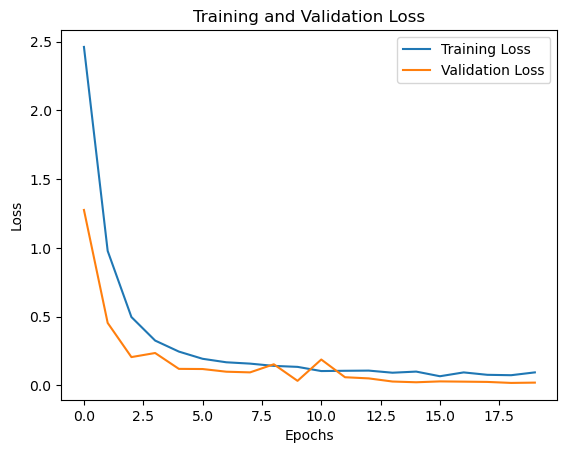

In [62]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of model.fit()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Graph formatting
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
Accuracy: 0.9966
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.99      1.00      0.99       444
           2       1.00      1.00      1.00       444
           3       0.99      1.00      0.99       295
           4       1.00      1.00      1.00       396
           5       0.99      0.98      0.99       338
           6       0.99      1.00      0.99        87
           7       1.00      1.00      1.00       324
           8       1.00      1.00      1.00       260
           9       1.00      1.00      1.00       274
          10       1.00      1.00      1.00       417
          11       0.99      1.00      0.99       246
          12       1.00      1.00      1.00       453
          13       1.00      1.00      1.00       431
          14       1.00      1.00      1.00       165
          15       1.00      1.00      1.00       134

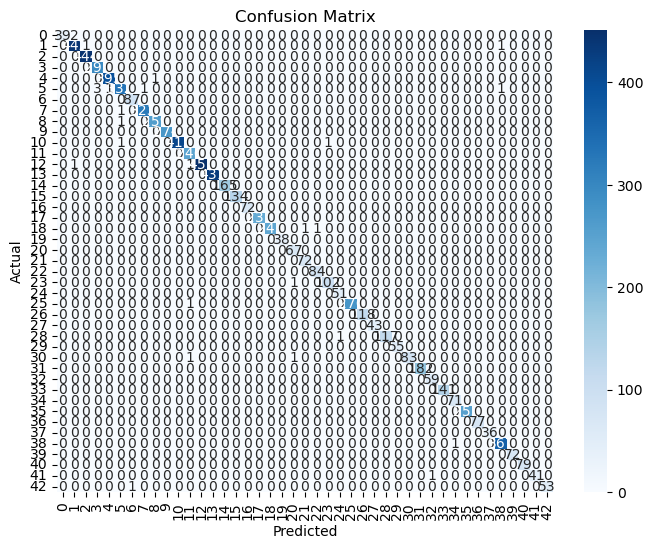

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions
y_pred_probs = model.predict(x_test)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Convert y_test to categorical if needed
if len(y_train.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

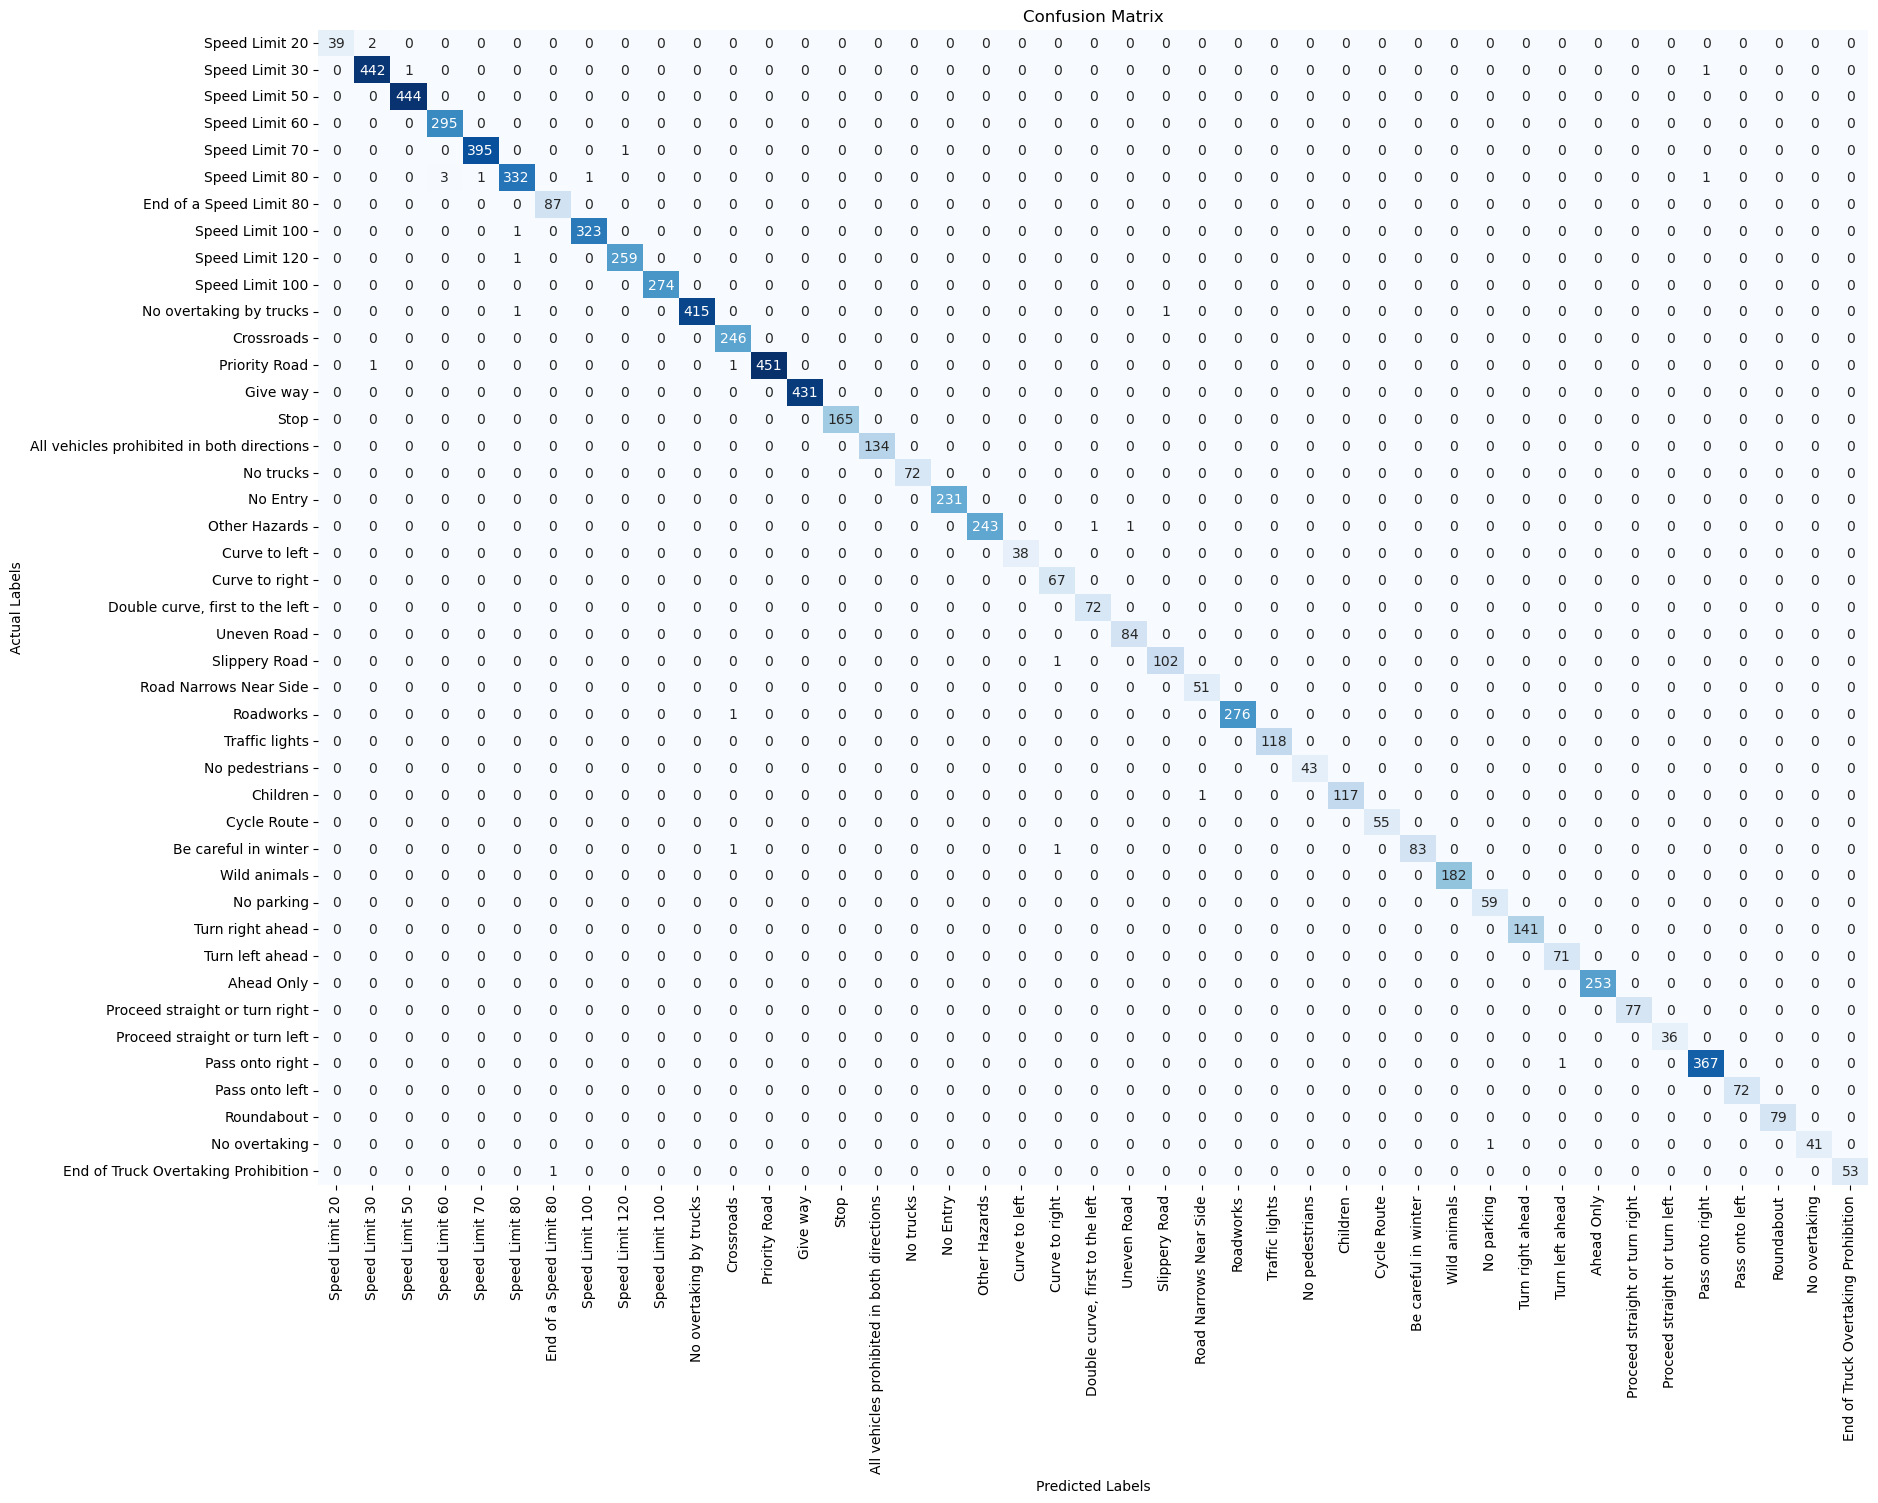

In [82]:
cm = confusion_matrix(y_test, y_pred )

plt.figure(figsize=(20, 15))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='Blues',
    xticklabels=list(label_name.values()),
    yticklabels=list(label_name.values()),
    cbar=False
)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix');

In [ ]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

In [ ]:
df_test=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Anaconda Workspace\Mini Project gtsrb\Dataset\Test.csv")
df_test=df_test[["ClassId","Path"]]
df_test.head()

In [ ]:
df_test['ClassId_name_actual']=df_test['ClassId'].map(label_name)
df_test.sample(5)

In [ ]:
test_dir=r"C:\Users\DELL\OneDrive\Desktop\Anaconda Workspace\Mini Project gtsrb\Dataset\Test"
df_test["Path"]=test_dir+df_test["Path"]

df_test.sample(5)

In [ ]:
x_test=[]
for img in df_test['Path']:
    img=cv2.imread(img)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(32,32))
    img=img/255.0 #normalization
    x_test.append(img)
x_test=np.array(x_test)

x_test = x_test.reshape((-1, 32, 32, 3))


y_test=df_test[["ClassId"]]


predictions=model.predict(x_test)
predictions=predictions.argmax(axis=-1)
predictions=np.array(predictions)

accuracy_score(predictions,y_test)


cm = confusion_matrix(y_test, predictions)  

plt.figure(figsize=(20, 15))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='Blues',
    xticklabels=label_name.values(),
    yticklabels=label_name.values(),
    cbar=False
)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix');

In [ ]:
df["label"].value_counts()

In [ ]:
np.unique(df["label"])

In [ ]:
sorted(labels)

In [ ]:
os.listdir(image_path)

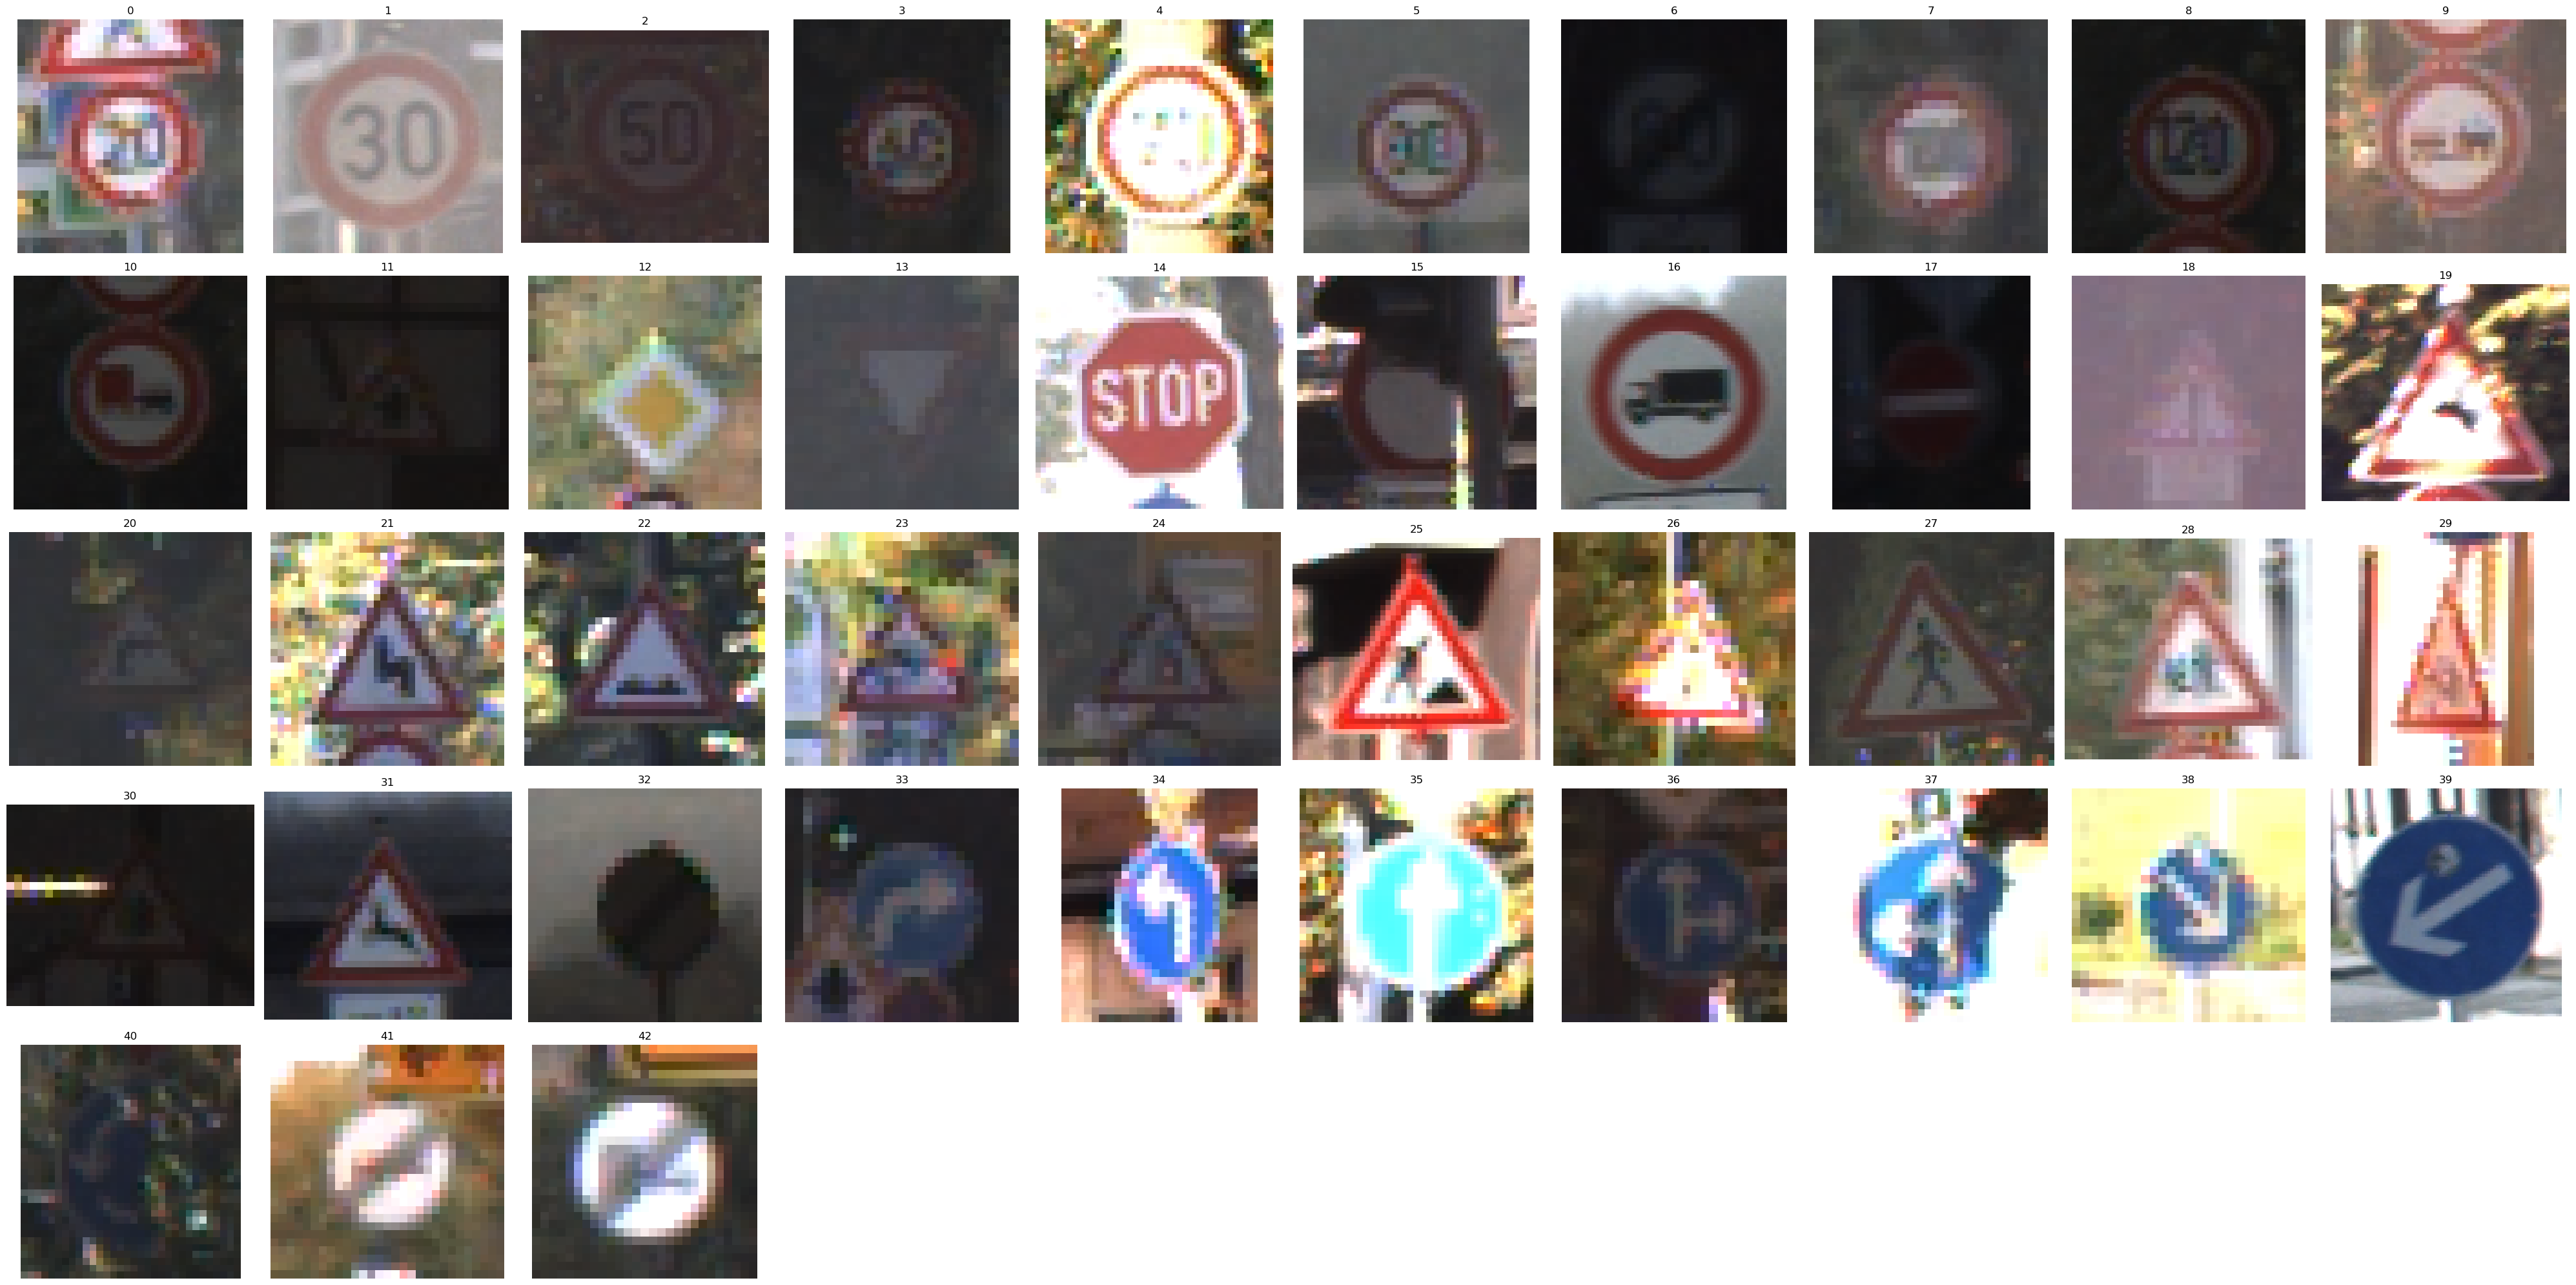

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import math

# Load dataset (assuming df is already available)
# df["img"] contains image paths
# df["label"] contains class labels

# Select one image per unique class
unique_classes = df.groupby("label").first().reset_index()

# Define grid size
num_classes = len(unique_classes)
cols = min(10, num_classes)  # Set max 5 images per row for clarity
rows = math.ceil(num_classes / cols)  # Calculate required rows

# Set up the figure size
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each image
for i, (_, row) in enumerate(unique_classes.iterrows()):
    img = Image.open(row["img"])
    axes[i].imshow(img)
    axes[i].set_title(row["label"], fontsize=12)
    axes[i].axis("off")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
